# Donor match - with souporcell genotyping

In this notebook, we align donors (after running `cellSNP` and `vireo` without any genotype) by their genotypes. Specifically we are aligning the donor genotypes estimated with vireo from the scRNA-seq data with other the genotypes coming from other 'omics data (e.g., SNP array, Exome-seq). The idea is that we align the donors with giving least genotype difference, either using categorical genotype value or genotype probability.

To do so 

1. First run souporcell to genotype the barcodes in the scRNA-seq libaries and make a .vcf file with the varians in their reads (CellGen can do this for you, is computational expensive):



2. Use the code below will link the donor's genotype from the two libraries

In [1]:
from os.path import exists
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vireoSNP
print("vireoSNP version: %s" %vireoSNP.__version__)


def getdataframe(res, library_id):
    # What to make the function do
    
    df = pd.DataFrame(res['matched_GPb_diff'],
                 index=res['matched_donors1'],
                 columns=res['matched_donors2'])
    df['Patient'] = df.index
    df['library'] = library_id
    results = pd.melt(df, id_vars = ['Patient', 'library'])
    return results


def match_donors(scRNAseq_libraries, genotype_vcf):
    for library_id in scRNAseq_libraries:
#         print(library_id)


        # Link donors
        res = vireoSNP.vcf.match_VCF_samples('/home/jovyan/vireo/out_novcf/'+library_id+'/GT_donors.vireo.vcf.gz', 
                                              genotype_vcf,
                                             GT_tag1 = 'GT', GT_tag2='GT')


        # Save data frame
        results = getdataframe(res, library_id)
        results.to_csv('~/vireo/donor_assignements/'+library_id+'_donor_assignement.csv')


        # Plot
        fig = plt.figure()
        vireoSNP.plot.heat_matrix(res['matched_GPb_diff'], 
                                  res['matched_donors1'] , 
                                  res['matched_donors2'] )
        plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
        plt.tight_layout()
        plt.show()

        fig = plt.figure()
        vireoSNP.plot.heat_matrix(res['matched_GPb_diff'] < 0.11, 
                                  res['matched_donors1'] , 
                                  res['matched_donors2'] )
        plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
        plt.tight_layout()
        plt.show()

vireoSNP version: 0.5.8


In [2]:
# match_donors(scRNAseq_libraries=['UA_Endo12680033', 'UA_Endo12680034'],
#              genotype_vcf='/nfs/users/nfs_l/lg18/team292/lg18/endometriosis/data/genotypes/sample_specific_filtered/all_for_nuclei_deconvolution.renamed.fixed.vcf')

Shape for Geno Prob in VCF1: (59329, 2, 3)
Shape for Geno Prob in VCF2: (59329, 2, 3)
n_variants in VCF1, VCF2 and matched: 59329, 64696, 18765
aligned donors:
['donor0' 'donor1']
['donor0' 'donor1']


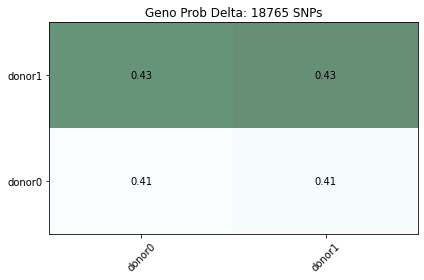

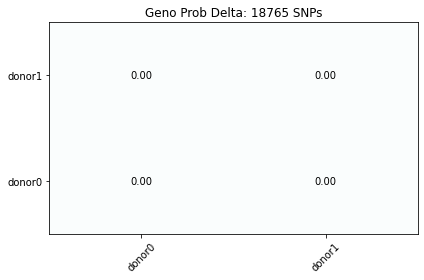

In [3]:
# Link donors
res = vireoSNP.vcf.match_VCF_samples('/home/jovyan/vireo/out_novcf/UA_Endo12680034/GT_donors.vireo.vcf.gz', 
                                      '/home/jovyan/vireo/out_novcf/UA_Endo12680033/GT_donors.vireo.vcf.gz',
                                     GT_tag1 = 'GT', GT_tag2='GT')


# Save data frame
# results = getdataframe(res, library_id)
# results.to_csv('~/vireo/donor_assignements/'+library_id+'_donor_assignement.csv')


# Plot
fig = plt.figure()
vireoSNP.plot.heat_matrix(res['matched_GPb_diff'], 
                          res['matched_donors1'] , 
                          res['matched_donors2'] )
plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
plt.tight_layout()
plt.show()

fig = plt.figure()
vireoSNP.plot.heat_matrix(res['matched_GPb_diff'] < 0.11, 
                          res['matched_donors1'] , 
                          res['matched_donors2'] )
plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
plt.tight_layout()
plt.show()

Shape for Geno Prob in VCF1: (59329, 2, 3)
Shape for Geno Prob in VCF2: (59329, 2, 3)
n_variants in VCF1, VCF2 and matched: 59329, 34313, 269
aligned donors:
['donor0' 'donor1']
['FX1233' 'FX1215']


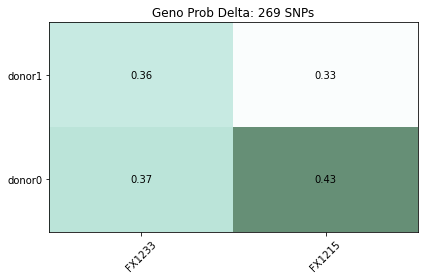

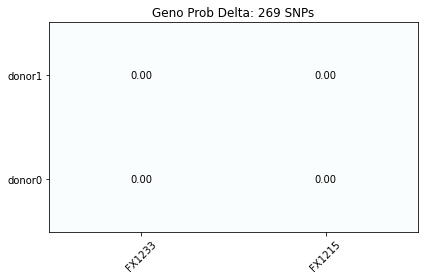

In [4]:
# Link donors
res = vireoSNP.vcf.match_VCF_samples('/home/jovyan/vireo/out_novcf/UA_Endo12680034/GT_donors.vireo.vcf.gz', 
                                      '/nfs/users/nfs_l/lg18/team292/lg18/endometriosis/data/genotypes/sample_specific_filtered/all_for_nuclei_deconvolution.renamed.fixed.vcf',
                                     GT_tag1 = 'GT', GT_tag2='GT')


# Save data frame
# results = getdataframe(res, library_id)
# results.to_csv('~/vireo/donor_assignements/'+library_id+'_donor_assignement.csv')


# Plot
fig = plt.figure()
vireoSNP.plot.heat_matrix(res['matched_GPb_diff'], 
                          res['matched_donors1'] , 
                          res['matched_donors2'] )
plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
plt.tight_layout()
plt.show()

fig = plt.figure()
vireoSNP.plot.heat_matrix(res['matched_GPb_diff'] < 0.11, 
                          res['matched_donors1'] , 
                          res['matched_donors2'] )
plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
plt.tight_layout()
plt.show()

Shape for Geno Prob in VCF1: (247924, 2, 3)
Shape for Geno Prob in VCF2: (247924, 2, 3)
n_variants in VCF1, VCF2 and matched: 247924, 141342, 115990
aligned donors:
['0' '1']
['0' '1']


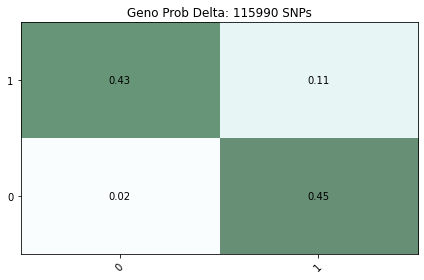

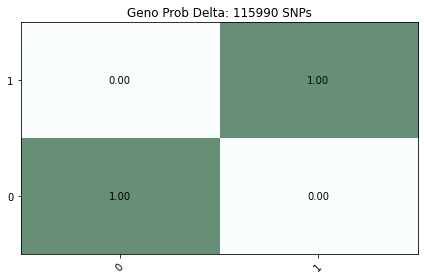

In [8]:
# Link donors
library_id = 'UA_Endo12680033'
res = vireoSNP.vcf.match_VCF_samples('/lustre/scratch126/cellgen/cellgeni/tickets/nextflow-tower-results/sm42/1678704302591/souporcell-results/UA_Endo12680033/cluster_genotypes.vcf', 
                                      '/lustre/scratch126/cellgen/cellgeni/tickets/nextflow-tower-results/sm42/1678704302591/souporcell-results/UA_Endo12680034/cluster_genotypes.vcf',
                                     GT_tag1 = 'GT', GT_tag2='GT')


# Save data frame
results = getdataframe(res, library_id)
results.to_csv('~/vireo/donor_assignements/'+library_id+'_donor_assignement.csv')


# Plot
fig = plt.figure()
vireoSNP.plot.heat_matrix(res['matched_GPb_diff'], 
                          res['matched_donors1'] , 
                          res['matched_donors2'] )
plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
plt.tight_layout()
plt.show()

fig = plt.figure()
vireoSNP.plot.heat_matrix(res['matched_GPb_diff'] < 0.11, 
                          res['matched_donors1'] , 
                          res['matched_donors2'] )
plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
plt.tight_layout()
plt.show()

Shape for Geno Prob in VCF1: (141342, 2, 3)
Shape for Geno Prob in VCF2: (141342, 2, 3)
n_variants in VCF1, VCF2 and matched: 141342, 247924, 115990
aligned donors:
['0' '1']
['0' '1']


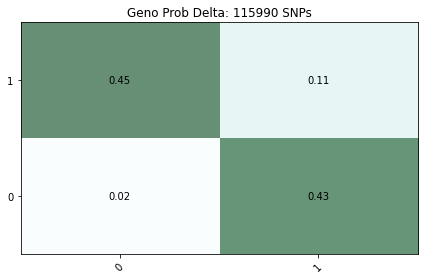

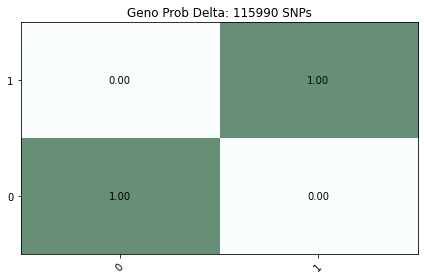

In [9]:
# Link donors
library_id = 'UA_Endo12680034'
res = vireoSNP.vcf.match_VCF_samples('/lustre/scratch126/cellgen/cellgeni/tickets/nextflow-tower-results/sm42/1678704302591/souporcell-results/UA_Endo12680034/cluster_genotypes.vcf', 
                                      '/lustre/scratch126/cellgen/cellgeni/tickets/nextflow-tower-results/sm42/1678704302591/souporcell-results/UA_Endo12680033/cluster_genotypes.vcf',
                                     GT_tag1 = 'GT', GT_tag2='GT')


# Save data frame
results = getdataframe(res, library_id)
results.to_csv('~/vireo/donor_assignements/'+library_id+'_donor_assignement.csv')


# Plot
fig = plt.figure()
vireoSNP.plot.heat_matrix(res['matched_GPb_diff'], 
                          res['matched_donors1'] , 
                          res['matched_donors2'] )
plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
plt.tight_layout()
plt.show()

fig = plt.figure()
vireoSNP.plot.heat_matrix(res['matched_GPb_diff'] < 0.11, 
                          res['matched_donors1'] , 
                          res['matched_donors2'] )
plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
plt.tight_layout()
plt.show()